In [ ]:
! pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy.matlib
import opendatasets as od
random.seed(117)
sns.set()

In [ ]:
od.download("https://www.kaggle.com/c/titanic")

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [ ]:
datasetShip = pd.read_csv("/content/titanic/train.csv")

cluster = datasetShip[['Fare','Age']].copy(deep=True)
cluster.dropna(axis=0, inplace=True)
cluster.sort_values(by=['Fare','Age'], inplace=True)
cl1 = cluster['Fare'].tolist()
cl2 = cluster['Age'].tolist()
dataset = [(i,j) for i,j in zip(cl1,cl2)]

In [ ]:
class KMeans():
  def __init__(self, ds, k, itr, times):
    self.k = k
    self.itr = itr
    self.times = times
    self.ds = ds
    self.clusters = []
    self.centroids = []

  def itrtng(self):
    for i in range(self.times):
      clusters, centroids = self.algorithm()
      self.clusters.append(clusters)
      self.centroids.append(centroids)
  
  def __repr__(self):
    rs = f'Using k = {self.k} :-\n'
    for i in range(len(self.clusters)):
      rs += f'\n\tTrial {i+1}:\n'
      for j in range(self.k):
        rs += f'\t\tC{j+1}: {set(self.clusters[i][j])}\n'
    return rs

  def findCentroids(self, clusters):
    centroids = []
    for i in clusters:
      xSum, ySum = 0, 0
      for j in i:
        xSum += j[0]
        ySum += j[1]
      centroids.append((xSum/len(i), ySum/len(i)))
    return centroids

  def algorithm(self):
    initialCentroids = random.sample(self.ds, self.k)
    previousCentroids = initialCentroids
    previousClusters = [[] for i in range(self.k)]
    for i in range(self.itr):
      if i == 0:
        for j in self.ds:
          distOfDataPointFromEachCentroid = [(idx ,((j[0] - k[0])**2 + (j[1] - k[1])**2)**(0.5)) for idx, k in enumerate(initialCentroids)]
          centroidNearestToDataPoint = sorted(distOfDataPointFromEachCentroid, key=lambda x: x[1])[0][0]
          previousClusters[centroidNearestToDataPoint].append(j)
        tmp = []
        for j in previousClusters:
          tmp.append(frozenset(j))
        previousClusters = tmp
      else:
        currentCentroids = self.findCentroids(previousClusters)
        if set(currentCentroids) == set(previousCentroids):
          return previousClusters, previousCentroids
        else:
          previousCentroids = currentCentroids
          currentClusters = [[] for i in range(self.k)]
          for j in self.ds:
            distOfDataPointFromEachCentroid = [(idx ,((j[0] - k[0])**2 + (j[1] - k[1])**2)**(0.5)) for idx, k in enumerate(previousCentroids)]
            centroidCloseToDataPoint = sorted(distOfDataPointFromEachCentroid, key=lambda x: x[1])[0][0]
            currentClusters[centroidCloseToDataPoint].append(j)
          tmp = []
          for j in currentClusters:
            tmp.append(frozenset(j))
          currentClusters = tmp
          if set(currentClusters) == set(previousClusters):
            return previousClusters, previousCentroids
          else:
            previousClusters = currentClusters
    return previousClusters, previousCentroids

Dataset Name : Titanic 

Enter the value of k : 2
The value of k is : 2

How many iterations you want : 2
The algorithm will be run 2 times.

Using k = 2 :-

	Trial 1:
		C1: {(31.275, 6.0), (65.0, 24.0), (30.0, 26.0), (52.0, 35.0), (7.925, 25.0), (7.05, 25.0), (7.225, 25.0), (7.25, 25.0), (7.65, 25.0), (7.7417, 25.0), (7.775, 25.0), (7.8958, 25.0), (83.475, 35.0), (16.1, 28.5), (47.1, 28.0), (17.8, 25.0), (81.8583, 4.0), (8.05, 24.0), (8.05, 24.5), (8.85, 24.0), (36.75, 8.0), (9.825, 21.0), (14.4542, 18.0), (12.475, 6.0), (108.9, 18.0), (12.0, 17.0), (11.1333, 27.0), (12.65, 28.0), (247.5208, 50.0), (262.375, 18.0), (30.0708, 14.0), (30.0, 29.0), (19.2583, 24.0), (66.6, 22.0), (19.5, 13.0), (52.5542, 37.0), (7.8958, 22.0), (56.4958, 32.0), (7.225, 22.0), (7.125, 22.0), (7.2292, 22.0), (7.25, 22.0), (7.5208, 22.0), (7.75, 22.0), (7.775, 22.0), (7.7958, 22.0), (17.8, 18.0), (110.8833, 39.0), (89.1042, 49.0), (8.05, 18.0), (8.3, 18.0), (211.3375, 43.0), (26.0, 24.0), (12.475, 27.0), (262.

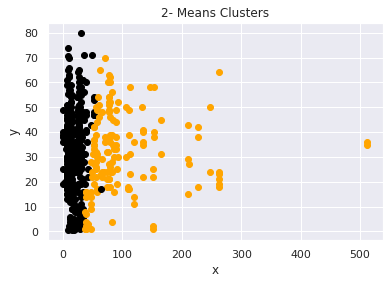

Do you want to continue? (Y/N): Y

Enter the value of k : 3
The value of k is : 3

How many iterations you want : 3
The algorithm will be run 3 times.

Using k = 3 :-

	Trial 1:
		C1: {(65.0, 24.0), (30.0, 26.0), (52.0, 35.0), (8.05, 44.0), (16.1, 28.5), (47.1, 28.0), (8.05, 50.0), (7.55, 42.0), (7.65, 42.0), (13.0, 32.0), (13.0, 32.5), (13.5, 45.0), (25.9292, 49.0), (24.15, 39.0), (10.5, 70.0), (26.0, 54.0), (30.0, 29.0), (52.0, 42.0), (26.0, 37.0), (52.5542, 42.0), (66.6, 22.0), (27.7208, 40.0), (8.6625, 38.0), (27.9, 40.0), (33.5, 61.0), (52.5542, 37.0), (29.7, 37.0), (56.4958, 32.0), (7.05, 35.0), (7.125, 35.0), (7.8958, 35.0), (31.3875, 38.0), (10.5, 36.0), (49.5042, 71.0), (7.925, 44.0), (8.6833, 31.0), (13.0, 38.0), (9.5, 30.0), (0.0, 49.0), (51.8625, 54.0), (0.0, 36.0), (15.55, 36.0), (25.5875, 47.0), (26.0, 44.0), (30.5, 27.0), (46.9, 43.0), (27.75, 33.0), (8.05, 45.0), (21.0, 27.0), (53.1, 33.0), (9.475, 40.0), (8.05, 32.0), (8.3625, 32.0), (41.5792, 22.0), (56.4958, 26.0), (

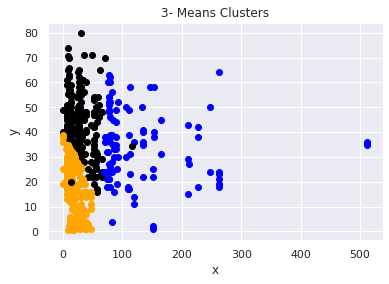

Do you want to continue? (Y/N): N


In [ ]:
print('Dataset Name : Titanic ',)
while(True):
  k = int(input('\nEnter the value of k : '))
  print(f'The value of k is : {k}\n')
  innerIterations = int(input('How many iterations you want : '))
  print(f'The algorithm will be run {innerIterations} times.\n')
  outerIterations = int(2)
  if k > len(dataset):
    print('Value of k should be <= number of points in dataset\n')
  else:
    kMeans = KMeans(dataset, k, innerIterations, outerIterations)
    kMeans.itrtng()
    print(kMeans)
  if k == 2:
    clusters = kMeans.clusters[len(kMeans.centroids)-1]
    xCluster1 = []
    yCluster1 = []
    xCluster2 = []
    yCluster2 = []
    for i in range(len(clusters)):
      tmp = list(clusters[i])
      if i == 0:
        for j in clusters[i]:
          xCluster1.append(j[0])
          yCluster1.append(j[1])
      if i == 1:
        for j in clusters[i]:
          xCluster2.append(j[0])
          yCluster2.append(j[1])
    plt.scatter(xCluster1,yCluster1, color='black')
    plt.scatter(xCluster2,yCluster2, color='orange')
    plt.scatter(kMeans.centroids[len(kMeans.centroids)-1][0][0], kMeans.centroids[len(kMeans.centroids)-1][0][1], color='black')
    plt.scatter(kMeans.centroids[len(kMeans.centroids)-1][1][0], kMeans.centroids[len(kMeans.centroids)-1][1][1], color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{k}- Means Clusters')
    plt.show()

  if k == 3:
    clusters = kMeans.clusters[len(kMeans.centroids)-1]
    xCluster1 = []
    yCluster1 = []
    xCluster2 = []
    yCluster2 = []
    xCluster3 = []
    yCluster3 = []
    for i in range(len(clusters)):
      tmp = list(clusters[i])
      if i == 0:
        for j in clusters[i]:
          xCluster1.append(j[0])
          yCluster1.append(j[1])
      if i == 1:
        for j in clusters[i]:
          xCluster2.append(j[0])
          yCluster2.append(j[1])
      if i == 2:
        for j in clusters[i]:
          xCluster3.append(j[0])
          yCluster3.append(j[1])
    plt.scatter(xCluster1,yCluster1, color='black')
    plt.scatter(xCluster2,yCluster2, color='orange')
    plt.scatter(xCluster3,yCluster3, color='blue')
    plt.scatter(kMeans.centroids[len(kMeans.centroids)-1][0][0], kMeans.centroids[len(kMeans.centroids)-1][0][1], color='black')
    plt.scatter(kMeans.centroids[len(kMeans.centroids)-1][1][0], kMeans.centroids[len(kMeans.centroids)-1][1][1], color='black')
    plt.scatter(kMeans.centroids[len(kMeans.centroids)-1][2][0], kMeans.centroids[len(kMeans.centroids)-1][2][1], color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{k}- Means Clusters')
    plt.show()

  toContinue = None
  while(True):
    y_or_n = input('Do you want to continue? (Y/N): ')
    if y_or_n == 'Y':
      toContinue = True
      break
    elif y_or_n == 'N':
      toContinue = False
      break
    else:
      print('Incorrect Choice Entered!\n')
  if toContinue:
    continue
  else:
    break